### Fungal non-ribosomal polyketide synthase genes notebook

#### Bats: Resistance and production of antibiotics while roosting or on the wing

Fungal non-reducing polyketide synthase (NRPKS) are not well understood. Their ecologic roles and distrubtions are understudied. Of intrest to bat biologist one group of the fungal NRPKS is found in Pseudogymnoascus destructans, the causitive agent of white-nose syndrome. 

#### Authors
Ara S. Winter<sup>1</sup>*, Jason C. Kimble<sup>1</sup>, Debbie C. Buecher<sup>2</sup>, Ernest W. Valdez<sup>3</sup>, Jennifer J. M. Hathaway<sup>1</sup>, Andrea Porras-Alfaro<sup>4</sup>, and Diana E. Northup<sup>1</sup>

1 Department of Biology, University of New Mexico, Albuquerque, New Mexico, United States of America

2 Buecher Biological Consulting, Tucson, Arizona, United States of America

3 United States Geological Survey, Fort Collins Science Center, Colorado; Biology Department, MSC03 2020, University of New Mexico, Albuquerque, New Mexico, United States of America

4 Department of Biological Sciences, Western Illinois University, Macomb, Illinois, United States of America

Corresponding author

E-mail: akooser@unm.edu

### Methods

#### Bat sampling
We sampled 30 bats belonging to 4 species (Myotis thysanodes M. velifer, Tadarida brasiliensis, and Antrozous pallidus). These samples came from three study locations in Carlsbad Caverns National Park (CCNP). Bat sample collection was allowed under the following permits: National Park Service Scientific Collecting Permit (CAVE-2014-SCI-0012), Fort Collins Science Center Standard Operating Procedure (SOP) SOP#: 2013-01, and an Institutional Animal Care and Use Committee (IACUC) Permit from the University of New Mexico (Protocol #15-101307-MC) and from the National Park Service (Protocol #IMR_ELMA.PARA.CAVE.SEAZ_Northup_Bats_2015.A2).

Cave-caught bats were either plucked from the walls of the caves in ELMA, FS, and HGL or netted in sterilized nets in Carlsbad Cavern in CCNP in a location along their flight path out of the cave. Cave-caught bats were typically sampled 6-8 hours after returning to the cave in the early morning. Surface-netted bats were netted after sundown using sterilized nets near water sources in CCNP. All bats were handled with clean gloves and swabbed for DNA before other measurements were taken to limit contamination by human-associated microbiota. Using a sterile swab moistened with Ringer’s Solution (Hille, 1984), the entire skin (i.e., ears, wings and uropatagia) and furred surfaces of each bat were thoroughly swabbed. While the bat biologist held the bat in appropriate positions to give access to the area to be swabbed, the microbiologist rubbed each area with the sterile swab approximately 3-5 times, rotating the swab as the action was performed.

Each swab was placed in a sterile 1.7 ml snap-cap microcentrifuge tube containing 100 ul of RNAlater, and immediately frozen in a liquid nitrogen dry shipper or placed on dry ice. Samples were transported to the University of New Mexico and stored in a -80°C freezer. Samples were sent to MR DNA Molecular Research LP, Shallowater, Texas (http://www.mrdnalab.com/) for genomic DNA extraction.

#### Sequencing
Metagenomic shotgun reads were sequenced at MR DNA (2015-2016) using HiSeq 2x150bp Illumina HiSeq 2500 platform (www.illumina.com) sequencing. Metagenome sequencing steps included the isolation and purification of genomic DNA, fragmentation, ligation to sequencing adapters and purification. Libraries were pooled and sequenced following amplification and denaturation. A total of 50 ng of DNA from each of the FSC samples was used to prepare DNA libraries using Nextera DNA library preparation kit to build individual barcode catalogs. Library insert size was determined by Experion Automated Electrophoresis Station (Bio-Rad). Pooled library (12pM) was loaded to a 600 Cycles v3 Reagent cartridge (Illumina).

#### Data processing
Join paired-ends
pear -y 8G -j 2 -p 0.05 -g 2 -f RSS140624-1_S19_L002_R1_001.fastq.gz -r RSS140624-1_S19_L002_R2_001.fastq.gz 
-o RSS140624_1_S19 

##### Fastq convert to fasta
fastq_to_fasta.py

##### Digital normalization (removes redundant kmers)
normalize-by-median.py -k 21 -M 8e9 --cutoff=20 ELMA140612_1_S56.fasta (khmer package)

##### Recover LSU and SSUs from reads
metaxa2 -i CC15062425_S8.fasta -o CC15062425_S8 --cpu 6 --align none

metaxa2_ttt -i CC15062425_S8.taxonomy.txt -o CC15062425_S8_taxa_sum.txt

Put all the L2 and L3 into separate folders and then run:
metaxa2_dc -o metaxa_summary_L2.txt -r *.level_2.txt

##### Hashing to metagenomes (sourmash and mash) 

sourmash compute -f ELMA140612_1_S56.fasta.keep

sourmash compare *.sig -o cmp

sourmash plot cmp

##### Convert nuc reads to aa
prodigal -i CC15062421_S7.classseqs.fasta -a CC15062421_S7.faa -p meta > /dev/null

##### Functional gene annotation
hmmsearch --cpu 6 --domtblout retroviridae_S19 ~/Documents/hmmer_profiles/eggnog/hmm_files/retorviridae_eggnog.hmm CC1506261_S19.faa > /dev/null

Used: resFam-full.hmm, custom fungal nrps, PKSII alpha, and pfam secondary metabolite profiles.


In [1]:
import seaborn as sns
import pandas as pd
import glob
import os

# This is a commnet. The line the follows allows for inline plotting. i.e. your plots will show up in these boxes.
%matplotlib inline

from IPython.display import Image

The chunk of code that follows here is for wrangling the output of hmmer functional gene profiling into something human readable and readable by pandas in python. 

In [2]:
path = '/Users/ara/Documents/bat_metagenomes/fungal_nrpks/'                     # use your path

In [3]:
my_dir = path
filelist = []
filesList = []
os.chdir( my_dir )

In [4]:
for files in glob.glob("*.fungal_nrpks"):
    #fileName, fileExtension = os.path.splitext(files)
    filelist.append(filesList) #filename without extension
    filesList.append(files) #filename with extension

In [5]:
df = pd.DataFrame()
for ijk in filesList:
    frame = pd.read_csv(ijk,skiprows=3, skipfooter=11 ,delim_whitespace=True,
                      engine='python',header=None)
    frame['sample_id']=ijk
    df = df.append(frame) 
    

In [6]:
#df

In [7]:
df.columns = ['hmmer_seq','','','gene','','','E-value','bit score','','','','','','','','','','','','','','',
                         '','','','','','','','','sample_id']

In [8]:
df.head(3)

,hmmer_seq,,,gene,,,E-value,bit score,,,...,,,,,,,,,,sample_id
0,D00420:54:H9U8TADXX:1:1109:11607:24165_1,-,85,Fungal_NRPKS_Group_1,-,2080,3.900000e-27,99.6,0.7,1,...,0.96,#,3,#,257,#,1,#,ID=201169_1;partial=11;start_type=Edge;rbs_mot...,CC140620_1.fungal_nrpks
1,D00420:54:H9U8TADXX:1:2202:11066:71886_1,-,86,Fungal_NRPKS_Group_1,-,2080,1.800000e-26,97.3,0.3,1,...,0.98,#,3,#,260,#,1,#,ID=1114276_1;partial=11;start_type=Edge;rbs_mo...,CC140620_1.fungal_nrpks
2,D00420:54:H9U8TADXX:1:1106:13003:61670_1,-,78,Fungal_NRPKS_Group_1,-,2080,2.800000e-23,86.8,0.3,1,...,0.99,#,2,#,235,#,1,#,ID=139318_1;partial=11;start_type=Edge;rbs_mot...,CC140620_1.fungal_nrpks


In [9]:
hmmer_results = df.loc[:,['hmmer_seq','gene','E-value','bit score','sample_id']]

In [10]:
hmmer_filter = hmmer_results.loc[hmmer_results['bit score'] > 24]

In [11]:
hmmer_filter.shape

(21533, 5)

In [12]:
df = hmmer_filter.groupby( [ "sample_id", "gene"] ).size().to_frame(name = 'count').reset_index()

In [13]:
hmmer_pivot = df.pivot(index='sample_id', columns='gene', values='count')

In [14]:
del hmmer_pivot.index.name

In [15]:
hmmer_pivot.shape

(34, 9)

In [16]:
hmmer_clean = hmmer_pivot.fillna(0)

In [17]:
hmmer_clean.reset_index(level=0, inplace=True)

In [18]:
hmmer_clean=hmmer_clean.rename(columns = {'index':'id'})

In [19]:
hmmer_clean.head(3)

gene,id,Fungal_NRPKS_Group_1,Fungal_NRPKS_Group_2,Fungal_NRPKS_Group_3,Fungal_NRPKS_Group_4,Fungal_NRPKS_Group_5,Fungal_NRPKS_Group_6,Fungal_NRPKS_Group_7,Fungal_NRPKS_Group_8,Fungal_NRPKS_Misc
0,CC140620_1.fungal_nrpks,136.0,84.0,79.0,84.0,84.0,110.0,74.0,120.0,128.0
1,CC140620_25.fungal_nrpks,63.0,34.0,40.0,37.0,45.0,58.0,42.0,68.0,60.0
2,CC140620_33.fungal_nrpks,91.0,49.0,52.0,54.0,61.0,73.0,64.0,86.0,74.0


In [20]:
hmmer_clean.columns

Index(['id', 'Fungal_NRPKS_Group_1', 'Fungal_NRPKS_Group_2',
       'Fungal_NRPKS_Group_3', 'Fungal_NRPKS_Group_4', 'Fungal_NRPKS_Group_5',
       'Fungal_NRPKS_Group_6', 'Fungal_NRPKS_Group_7', 'Fungal_NRPKS_Group_8',
       'Fungal_NRPKS_Misc'],
      dtype='object', name='gene')

### Results

#### Top twenty resistance gene hits

In [21]:
hmmer_clean.sum(numeric_only=True).sort_values(ascending=False).head(20)

gene
Fungal_NRPKS_Group_1    3003.0
Fungal_NRPKS_Group_8    2939.0
Fungal_NRPKS_Misc       2852.0
Fungal_NRPKS_Group_6    2777.0
Fungal_NRPKS_Group_5    2160.0
Fungal_NRPKS_Group_7    2078.0
Fungal_NRPKS_Group_4    1976.0
Fungal_NRPKS_Group_3    1917.0
Fungal_NRPKS_Group_2    1831.0
dtype: float64

Here we are reading in the metadata file.

In [22]:
metadata = pd.read_csv("fungal_nrpks_metadata.txt",sep="\t",header=0)

In [23]:
metadata.shape

(34, 8)

In [24]:
metadata.head(3)

,id,sample,species,location,cave_or_surface,recov_lsu_ssu,library_size,avg_seq_len
0,CC140620_1.fungal_nrpks,CC140620_1,Myotis velifer,CAVE,cave,706,1413632.0,181.2
1,CC140620_25.fungal_nrpks,CC140620_25,Myotis velifer,CAVE,cave,273,1629876.0,198.4
2,CC140620_33.fungal_nrpks,CC140620_33,Myotis velifer,CAVE,cave,193,576956.0,193.9


In [25]:
merged_hmmer = pd.merge(hmmer_clean, metadata, on='id')

In [26]:
merged_hmmer.shape

(34, 17)

In [27]:
merged_hmmer.head(3)

gene,id,Fungal_NRPKS_Group_1,Fungal_NRPKS_Group_2,Fungal_NRPKS_Group_3,Fungal_NRPKS_Group_4,Fungal_NRPKS_Group_5,Fungal_NRPKS_Group_6,Fungal_NRPKS_Group_7,Fungal_NRPKS_Group_8,Fungal_NRPKS_Misc,sample,species,location,cave_or_surface,recov_lsu_ssu,library_size,avg_seq_len
0,CC140620_1.fungal_nrpks,136.0,84.0,79.0,84.0,84.0,110.0,74.0,120.0,128.0,CC140620_1,Myotis velifer,CAVE,cave,706,1413632.0,181.2
1,CC140620_25.fungal_nrpks,63.0,34.0,40.0,37.0,45.0,58.0,42.0,68.0,60.0,CC140620_25,Myotis velifer,CAVE,cave,273,1629876.0,198.4
2,CC140620_33.fungal_nrpks,91.0,49.0,52.0,54.0,61.0,73.0,64.0,86.0,74.0,CC140620_33,Myotis velifer,CAVE,cave,193,576956.0,193.9


### Plot

This is a plot of total number of sequences and the recovered LSU and SSU genes from metaxa2.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


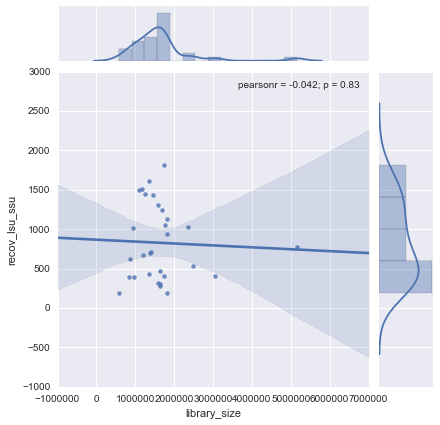

In [28]:
g = sns.jointplot("library_size", "recov_lsu_ssu", kind="reg", data=merged_hmmer)

### Notes
The total library size (# of sequences) does not track with the recovered LSU and SSU genes from metaxa. This means we
can use the total LSU and SSU to normalize our data. This will correct (in a biologically relevant way) for varying library sizes across all of our samples. 

### Library size
The library size here is the mean number of sequences by bat species. I want to make sure we are seeing a real signal downstream. 

ValueError: cannot convert float NaN to integer

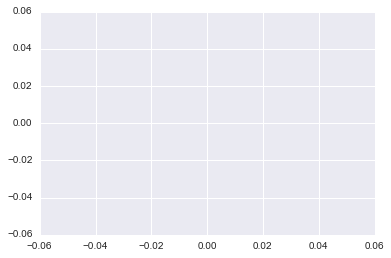

In [29]:
sns.distplot(merged_hmmer.library_size)

In [30]:
merged_hmmer.groupby('species')['library_size'].mean()

species
Antrozous pallidus       1.232008e+06
Myotis thysanodes        2.564295e+06
Myotis velifer           1.580415e+06
Myotis volens                     NaN
Tadarida brasiliensis    1.509662e+06
Name: library_size, dtype: float64

### Total recovery LSU and SSU genes

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


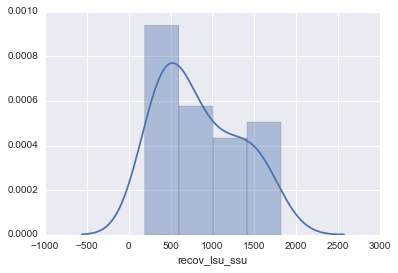

In [31]:
sns.distplot(merged_hmmer.recov_lsu_ssu)

In [32]:
merged_hmmer.groupby('species')['recov_lsu_ssu'].mean()

species
Antrozous pallidus       1230.428571
Myotis thysanodes         473.200000
Myotis velifer            572.200000
Myotis volens             897.750000
Tadarida brasiliensis    1014.625000
Name: recov_lsu_ssu, dtype: float64

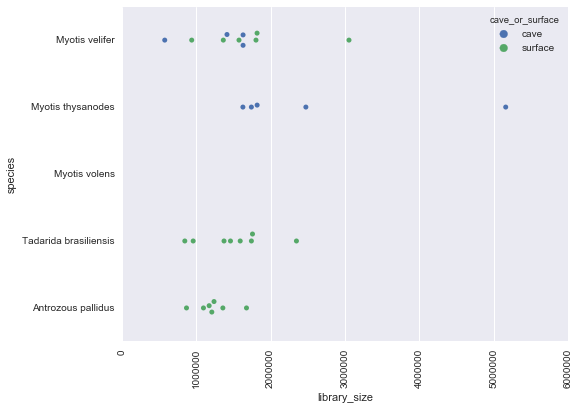

In [33]:
p0 = sns.swarmplot(x="library_size", y="species", data=merged_hmmer, hue="cave_or_surface")
sns.despine()
for item in p0.get_xticklabels():
    item.set_rotation(90)
p0.figure.set_size_inches(8,6)

#### Fungal NRPKS domains
Domains of typical highly reducing (HR), non-reducing (NR), and group V NR type I fungal polyketide synthases. (Throckmorton et al.)

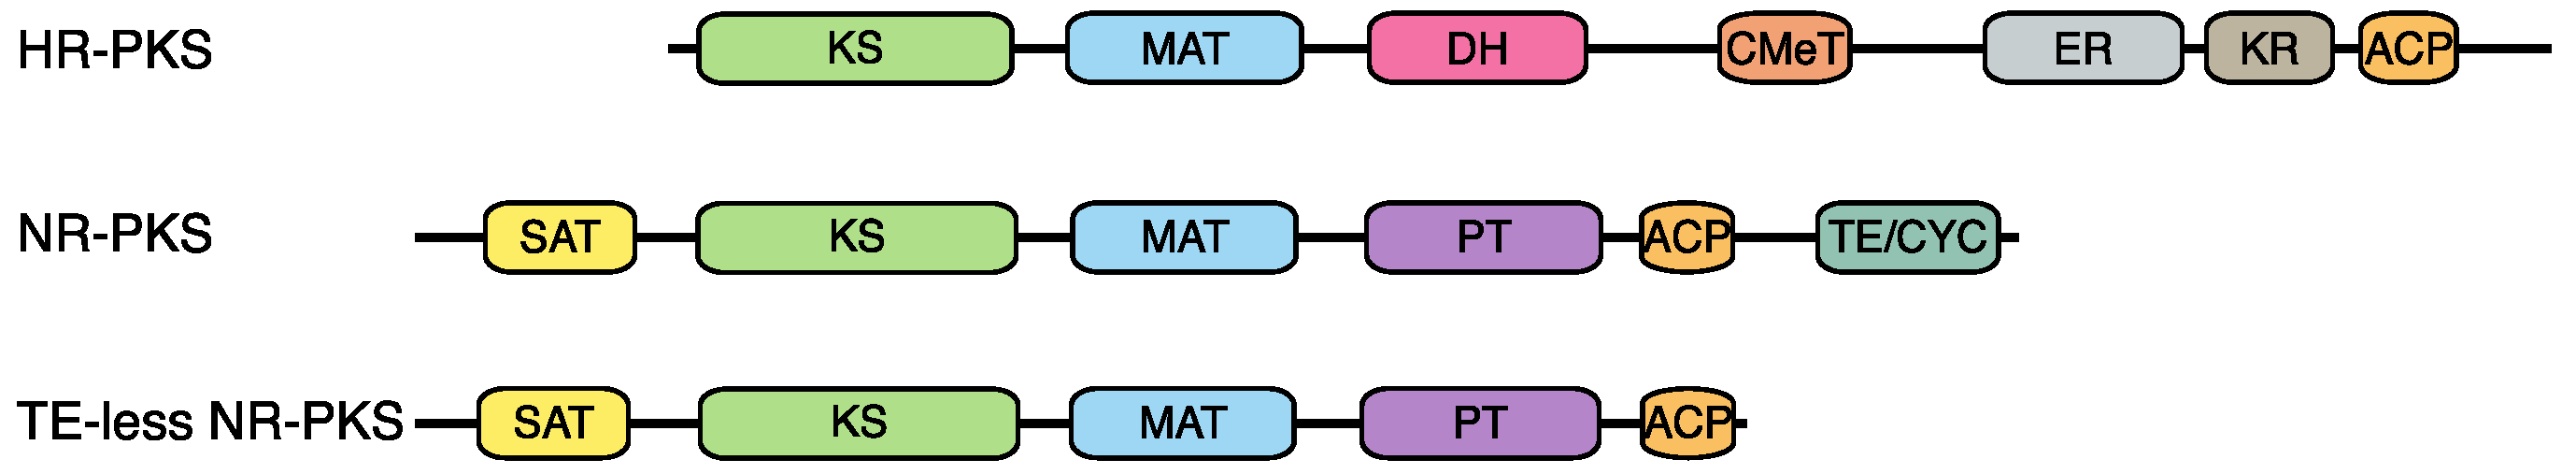

In [34]:
image0 = Image('toxins-07-03572-g001.png')
image0

#### 6/30/2016

>Fungal polyketides are a diverse class of natural products, or secondary metabolites (SMs), with a wide range of bioactivities often associated with toxicity. Here, we focus on a group of non-reducing polyketide synthases (NR-PKSs) in the fungal phylum Ascomycota that lack a thioesterase domain for product release, group V. Although widespread in ascomycete taxa, this group of NR-PKSs is notably absent in the mycotoxigenic genus Fusarium and, surprisingly, found in genera not known for their secondary metabolite production (e.g., the mycorrhizal genus Oidiodendron, the powdery mildew genus Blumeria, and the causative agent of white-nose syndrome in bats, Pseudogymnoascus destructans). This group of NR-PKSs, in association with the other enzymes encoded by their gene clusters, produces a variety of different chemical classes including naphthacenediones, anthraquinones, benzophenones, grisandienes, and diphenyl ethers. 

Of particular interest to us is: "found in ... and the causative agent of white-nose syndrome in bats, Pseudogymnoascus destructans"



Here are the total counts across all bats. Group 1 and 8 are most abundant. I need to run a handleful of other environments to see how those shake out. 


|NRPKS group          | Counts  |
|---------------------|---------|
|Fungal_NRPKS_Group_1 |   2618.0|
|Fungal_NRPKS_Group_8 |   2551.0|
|Fungal_NRPKS_Misc    |   2484.0|
|Fungal_NRPKS_Group_6 |   2406.0|
|Fungal_NRPKS_Group_5 |   1873.0|
|Fungal_NRPKS_Group_7 |   1805.0|
|Fungal_NRPKS_Group_4 |   1695.0|
|Fungal_NRPKS_Group_3 |   1642.0|
|Fungal_NRPKS_Group_2 |   1572.0|


In [35]:
merged_hmmer['Fungal_NRPKS_Group_1_S'] = merged_hmmer[['Fungal_NRPKS_Group_1']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Fungal_NRPKS_Group_2_S'] = merged_hmmer[['Fungal_NRPKS_Group_2']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Fungal_NRPKS_Group_3_S'] = merged_hmmer[['Fungal_NRPKS_Group_3']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Fungal_NRPKS_Group_4_S'] = merged_hmmer[['Fungal_NRPKS_Group_4']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Fungal_NRPKS_Group_5_S'] = merged_hmmer[['Fungal_NRPKS_Group_5']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Fungal_NRPKS_Group_6_S'] = merged_hmmer[['Fungal_NRPKS_Group_6']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Fungal_NRPKS_Group_7_S'] = merged_hmmer[['Fungal_NRPKS_Group_7']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Fungal_NRPKS_Group_8_S'] = merged_hmmer[['Fungal_NRPKS_Group_8']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['Fungal_NRPKS_Misc_S'] = merged_hmmer[['Fungal_NRPKS_Misc']].div(merged_hmmer.recov_lsu_ssu, axis=0)


Here is a plot of the five most abundant gene hits by raw counts. Below we scale the data by total recovered LSU and SSU genes.

#### 10/19/2016
Early HCA data showed a trend with size of bats. We added in the MYVO from ELMA since they are the smallest in our metagenomic data sets. 

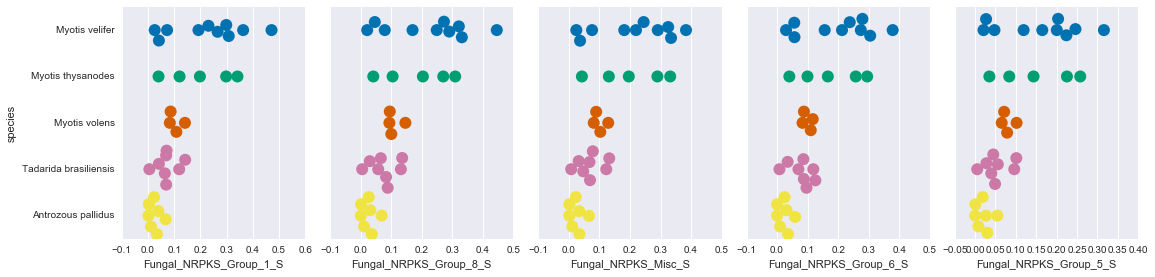

In [37]:
g = sns.PairGrid(merged_hmmer,
                 y_vars=["species"],
                 x_vars=["Fungal_NRPKS_Group_1_S", "Fungal_NRPKS_Group_8_S","Fungal_NRPKS_Misc_S",
                        "Fungal_NRPKS_Group_6_S","Fungal_NRPKS_Group_5_S"],
                 aspect=.75, size=4)
g.map(sns.swarmplot, palette="colorblind",size=12)

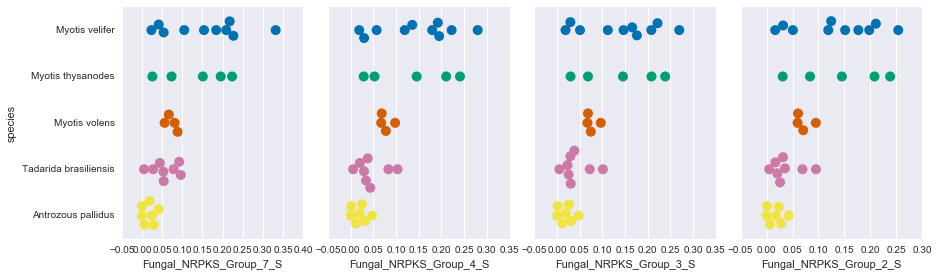

In [38]:
g2 = sns.PairGrid(merged_hmmer,
                 y_vars=["species"],
                 x_vars=["Fungal_NRPKS_Group_7_S", "Fungal_NRPKS_Group_4_S",
                        "Fungal_NRPKS_Group_3_S","Fungal_NRPKS_Group_2_S"],
                 aspect=.75, size=4)
g2.map(sns.swarmplot, palette="colorblind",size=10)

In [37]:
g.savefig("bat_fungal_nrpks_1.pdf")
g2.savefig("bat_fungal_nrpks_2.pdf")

#### 9/30/2016
The Antrozous pallidus (ANPA) always have the lowest relative counts of fungal NRPKS hits across all groups. They are the weird bats in the data set. Big, low aspect ratio wings, plant and ground flight feeding beahvior. 


They have the lowest mean library size 1232007.
And the mean recovered LSU and SSU is 1230, the second highest. That means the gene counts are being scaled hard in the face of smaller library sizes. However the scaling should balance out the gene count.

The group 5 NRPKS are the ones that can be found in Pseudogymnoascus destructans.



#### 10/19/2016

The volens fall in the middle in terms of the relative number of fungal NR-PKS genes present. 

Here I want to see the percentage of the total for each group. This makes it an easier comparision across different environments. 

In [39]:
df_counts = pd.DataFrame(hmmer_clean.sum(numeric_only=True).sort_values(ascending=False))

In [40]:
df_rel = pd.DataFrame((df_counts/df_counts.sum()*100))

In [41]:
df_rel

,0
gene,
Fungal_NRPKS_Group_1,13.946036
Fungal_NRPKS_Group_8,13.648818
Fungal_NRPKS_Misc,13.244787
Fungal_NRPKS_Group_6,12.896484
Fungal_NRPKS_Group_5,10.031115
Fungal_NRPKS_Group_7,9.650304
Fungal_NRPKS_Group_4,9.176613
Fungal_NRPKS_Group_3,8.902615
Fungal_NRPKS_Group_2,8.503228


#### 9/30/2016
So I need to find out what the other groups of fungal NRPKS do.

Group 1 - biosynthesis of aromatic portions in the resorcylic acid lactone, hypothemycin Hpm3, orsellinic acid, 

Group 2 - 1,3,6,8-tetrahydroxynaphthalene (THN) analogues

Group 3 -  naphthopyrone heptaketide synthas, bikaverin nonaketide synthase, 

Group 4 - a atoxin/sterigmatocystin, cercosporin, naphthaldehyde

Group 5 - naphthacenediones, anthraquinones, benzophenones, grisandienes, and diphenyl ethers (Throckmorton et al.)

Group 6 - 5-methylorsellinic acid

Group 7 - tetraketide orsellinaldehyde, pentaketide citrinin, hexaketide rubropunctatin, octaketide 2,4-dihydroxy-6-[(3E,5E,7E)-2-oxonona-3,5,7-trienyl]benzaldehyde

Group 8 - orsellinic acid

Group Misc - ???



#### 10/3/2016
We know have fungal NRPKS's from 7 different evironments. Hot deserts, polar deserts, volcanic soil, marine salt marsh, esturary, saline desert, and grasslands. 

From MGRAST:

4477873.hot_desert.faa

4477872.hot_desert.faa

4477805.hot_desert.faa

4477902.polar_desert.faa

4477903.polar_desert.faa

4477901.polar_desert.faa

4519600.marine_saltmarsh.faa

4519604.marine_saltmarsh.faa

4519606.marine_saltmarsh.faa

4533712.esturary.faa

4533713.esturary.faa

4533711.esturary.faa

4511190.grasslands.faa

4511151.grasslands.faa

4511188.grasslands.faa

4543022.3_saline_desert.faa

4514245.3_saline_desert.faa

4514299.3_saline_desert.faa

4522025_volcanic_soil.faa

4522026_volcanic_soil.faa

#### 10/3/2016

I need to calculate their percent abudance in the environment to see how the fungal NRPKS's on bats relates to other samples.

Across all these environments we end up with following counts:

|NRPKS Group         |Counts  |
|--------------------|--------|
|Fungal_NRPKS_Group_1|    8545|
|Fungal_NRPKS_Misc   |    8354|
|Fungal_NRPKS_Group_6|    8292|
|Fungal_NRPKS_Group_8|    8192|
|Fungal_NRPKS_Group_4|    5423|
|Fungal_NRPKS_Group_5|    5369|
|Fungal_NRPKS_Group_2|    5285|
|Fungal_NRPKS_Group_3|    5136|
|Fungal_NRPKS_Group_7|    5036|

For our bats it's was:

|NRPKS group          | Counts  |
|---------------------|---------|
|Fungal_NRPKS_Group_1 |   2618.0|
|Fungal_NRPKS_Group_8 |   2551.0|
|Fungal_NRPKS_Misc    |   2484.0|
|Fungal_NRPKS_Group_6 |   2406.0|
|Fungal_NRPKS_Group_5 |   1873.0|
|Fungal_NRPKS_Group_7 |   1805.0|
|Fungal_NRPKS_Group_4 |   1695.0|
|Fungal_NRPKS_Group_3 |   1642.0|
|Fungal_NRPKS_Group_2 |   1572.0|

Here is the relative abundance across the environments

|NRPKS Group         | % Abund   |	
|--------------------|-----------|
|Fungal_NRPKS_Group_1|	14.329555|
|Fungal_NRPKS_Misc	 |  14.009257|
|Fungal_NRPKS_Group_6|	13.905286|
|Fungal_NRPKS_Group_8|	13.737591|
|Fungal_NRPKS_Group_4|	9.094111 |
|Fungal_NRPKS_Group_5|	9.003555 |
|Fungal_NRPKS_Group_2|	8.862691 |
|Fungal_NRPKS_Group_3|	8.612825 |
|Fungal_NRPKS_Group_7|	8.445130 |

Overall it looks like there isn't much difference between the occurence of fungal NR-PKS in different environments and on bats. Follows a similar trend to the bacteria resistance genes.

### NMDS 
We use non-metric dimensional scaling quite a bit for looking at microbiome data. Here is a way to take your pandas dataframe and run an NMDS on your data.

In [42]:
from scipy.spatial.distance import *
import numpy as np
from sklearn import manifold

The MDS in scipy will only take in numerical data. You will have to hack away at your dataframe to get on the index (in our case gene) and the data. Here the columns I am interested in have a \_S in them. We take advantage of a nice regular expression built into pandas. 

In [43]:
df_S = merged_hmmer.filter(regex='_S')
df_S.head(3)

gene,Fungal_NRPKS_Group_1_S,Fungal_NRPKS_Group_2_S,Fungal_NRPKS_Group_3_S,Fungal_NRPKS_Group_4_S,Fungal_NRPKS_Group_5_S,Fungal_NRPKS_Group_6_S,Fungal_NRPKS_Group_7_S,Fungal_NRPKS_Group_8_S,Fungal_NRPKS_Misc_S
0,0.192635,0.118980,0.111898,0.118980,0.118980,0.155807,0.104816,0.169972,0.181303
1,0.230769,0.124542,0.146520,0.135531,0.164835,0.212454,0.153846,0.249084,0.219780
2,0.471503,0.253886,0.269430,0.279793,0.316062,0.378238,0.331606,0.445596,0.383420


More dataframe cleaning if you need it. And we run ths distance matrix. The squareform makes the matrix compact.

In [44]:
#mds_df = hmmer_clean.drop('id',1)
dist_mat = squareform(pdist(df_S,'braycurtis'))

Here we are creating a new dataframe with all the samples plus their Bray-Curtis distance.

In [45]:
pd.DataFrame(dist_mat, columns = merged_hmmer['id'], index=merged_hmmer['id']).head()

id,CC140620_1.fungal_nrpks,CC140620_25.fungal_nrpks,CC140620_33.fungal_nrpks,CC140620_37.fungal_nrpks,CC140620_5.fungal_nrpks,CC150624_21.fungal_nrpks,CC150624_25.fungal_nrpks,CC150624_29.fungal_nrpks,CC150626_1.fungal_nrpks,EST150404_1.fungal_nrpks,...,WCS140623_13.fungal_nrpks,WCS140623_5.fungal_nrpks,WCS140623_9.fungal_nrpks,WCS150622_5.fungal_nrpks,WCS150622_9.fungal_nrpks,WCS150625_13.fungal_nrpks,WCS150625_17.fungal_nrpks,WCS150625_25.fungal_nrpks,WCS150625_33.fungal_nrpks,WCS150625_9.fungal_nrpks
id,,,,,,,,,,,,,,,,,,,,,
CC140620_1.fungal_nrpks,0.000000,0.125051,0.421577,0.603603,0.282475,0.320874,0.079838,0.218464,0.258906,0.226005,...,0.871183,0.370556,0.990736,0.107935,0.316329,0.624159,0.440578,0.197995,0.165872,0.249599
CC140620_25.fungal_nrpks,0.125051,0.000000,0.313028,0.677514,0.163188,0.204009,0.065143,0.334380,0.138333,0.341408,...,0.898364,0.473659,0.992788,0.229884,0.199155,0.694967,0.536093,0.074795,0.285012,0.128560
CC140620_33.fungal_nrpks,0.421577,0.313028,0.000000,0.817225,0.157906,0.116456,0.353642,0.586065,0.182602,0.591249,...,0.945504,0.685107,0.996220,0.506466,0.121443,0.827892,0.727104,0.243944,0.549055,0.192203
CC140620_37.fungal_nrpks,0.603603,0.677514,0.817225,0.000000,0.757006,0.774476,0.652020,0.443639,0.745936,0.437245,...,0.564334,0.300189,0.963043,0.530211,0.772444,0.054214,0.222085,0.716025,0.486432,0.741490
CC140620_5.fungal_nrpks,0.282475,0.163188,0.157906,0.757006,0.000000,0.048356,0.207313,0.471823,0.037710,0.477967,...,0.925824,0.591154,0.994806,0.378860,0.041130,0.770745,0.643027,0.089485,0.428281,0.039647


Underneath this we actually run the NMDS and embed the x,y results back into our dataframe with the raw counts, normalized counts, and metadata.

In [46]:
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=3, n_jobs = 2, 
                   metric=False, max_iter=3000)
results = mds.fit(dist_mat)
coords = results.embedding_

In [47]:
merged_hmmer['X'] = [c[0] for c in coords]
merged_hmmer['Y'] = [c[1] for c in coords]
merged_hmmer.head(3)

gene,id,Fungal_NRPKS_Group_1,Fungal_NRPKS_Group_2,Fungal_NRPKS_Group_3,Fungal_NRPKS_Group_4,Fungal_NRPKS_Group_5,Fungal_NRPKS_Group_6,Fungal_NRPKS_Group_7,Fungal_NRPKS_Group_8,Fungal_NRPKS_Misc,...,Fungal_NRPKS_Group_2_S,Fungal_NRPKS_Group_3_S,Fungal_NRPKS_Group_4_S,Fungal_NRPKS_Group_5_S,Fungal_NRPKS_Group_6_S,Fungal_NRPKS_Group_7_S,Fungal_NRPKS_Group_8_S,Fungal_NRPKS_Misc_S,X,Y
0,CC140620_1.fungal_nrpks,136.0,84.0,79.0,84.0,84.0,110.0,74.0,120.0,128.0,...,0.118980,0.111898,0.118980,0.118980,0.155807,0.104816,0.169972,0.181303,0.302186,-0.044086
1,CC140620_25.fungal_nrpks,63.0,34.0,40.0,37.0,45.0,58.0,42.0,68.0,60.0,...,0.124542,0.146520,0.135531,0.164835,0.212454,0.153846,0.249084,0.219780,-0.011028,-0.009881
2,CC140620_33.fungal_nrpks,91.0,49.0,52.0,54.0,61.0,73.0,64.0,86.0,74.0,...,0.253886,0.269430,0.279793,0.316062,0.378238,0.331606,0.445596,0.383420,-0.494907,0.068532


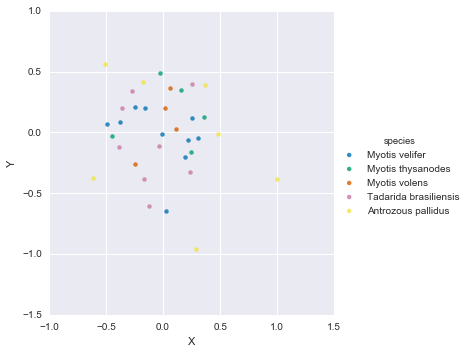

In [48]:
sns.lmplot("X", "Y", data=merged_hmmer, hue='species', fit_reg=False, palette="colorblind")

#### 10/19/2016
The NMDS is still weird for all these genes. Makes me wonder if I am coding this wrong. Need to test this out on another data set that I know has groups. 

And we see no grouping based on either bat species, location of sampling, or cave-caught/surface-netted.

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from pylab import savefig

In [50]:
# generate the linkage matrix
Z = linkage(df_S, method='average')

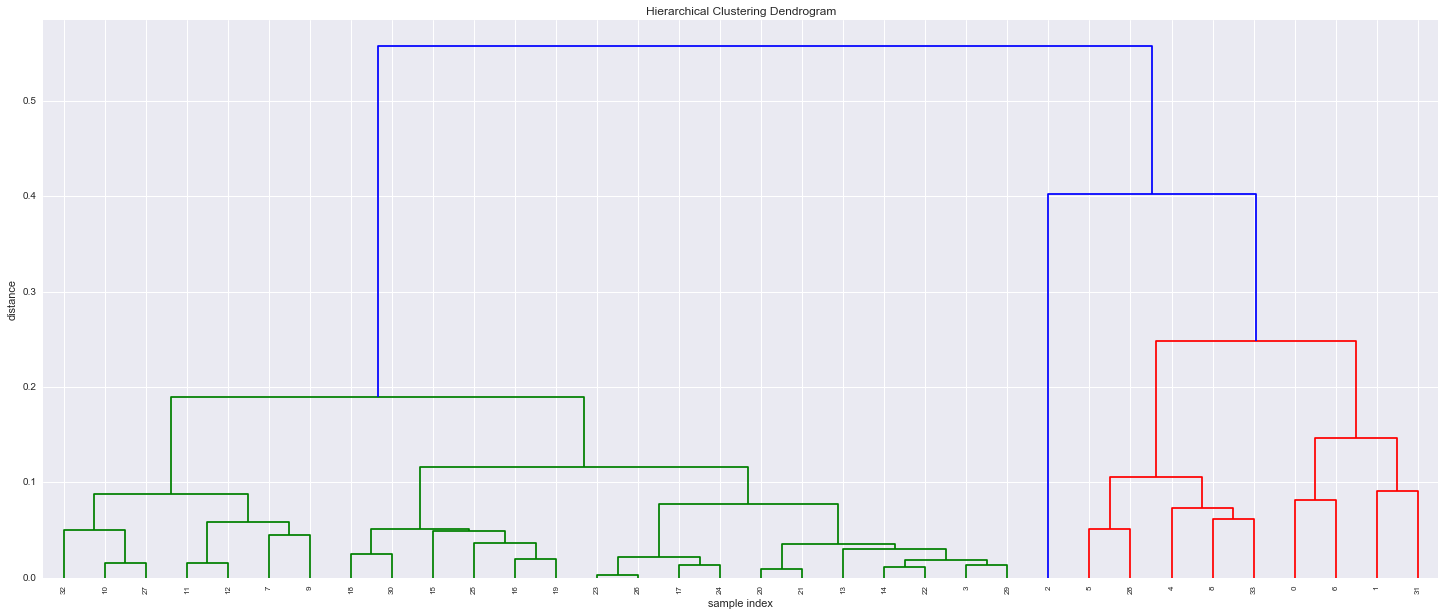

In [51]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
# In matplotlib the show command will reset the figure instance. In other words it goes bye-bye. So you need to save it
# first
plt.savefig('bat_fungal_NR-PKS_HCA_avergae.pdf',bbox_inches='tight')
plt.show()

#### 10/4/2016

Added the NMDS and HCA to the script. These are our basic tools for looking at patterns in the data. The NMDS showed no grouping based on bat species, cave or surface, or location. That struck me as odd. I am guessing this means that the fungal NR-PKS's are widely distrubted? Need to check against the environmental samples! The swarm plots indicted that there were some differences between species but it's not shaking out in the NMDS or HCA. 

In the HCA above we can see two groups. The red group is all Myotis of some sort. The green group is a mix of all four bat species. This is NOT the cave-caught or surface-netted split nor by location of capture. The data is normalized data to LSU and SSU counts.

In [55]:
merged_hmmer.location

0     CAVE
1     CAVE
2     CAVE
3     CAVE
4     CAVE
5     CAVE
6     CAVE
7     CAVE
8     CAVE
9      EST
10     EST
11     EST
12     EST
13     RSS
14     RSS
15     RSS
16     RSS
17     RSS
18     RSS
19     RSS
20     RSS
21     RSS
22     RSS
23     WCS
24     WCS
25     WCS
26     WCS
27     WCS
28     WCS
29     WCS
30     WCS
31     WCS
32     WCS
33     WCS
Name: location, dtype: object

#### 10/13/2016

It looks like our fungal NR-PKS genes are breaking out by size of bat. So we have small bats in the red cluster. The green cluster is the larger bats. There is some mixing likely do to bats at the edge of their size ranges. 

Really need to run the NMDS with all other environments and some other animal metagenomes. 

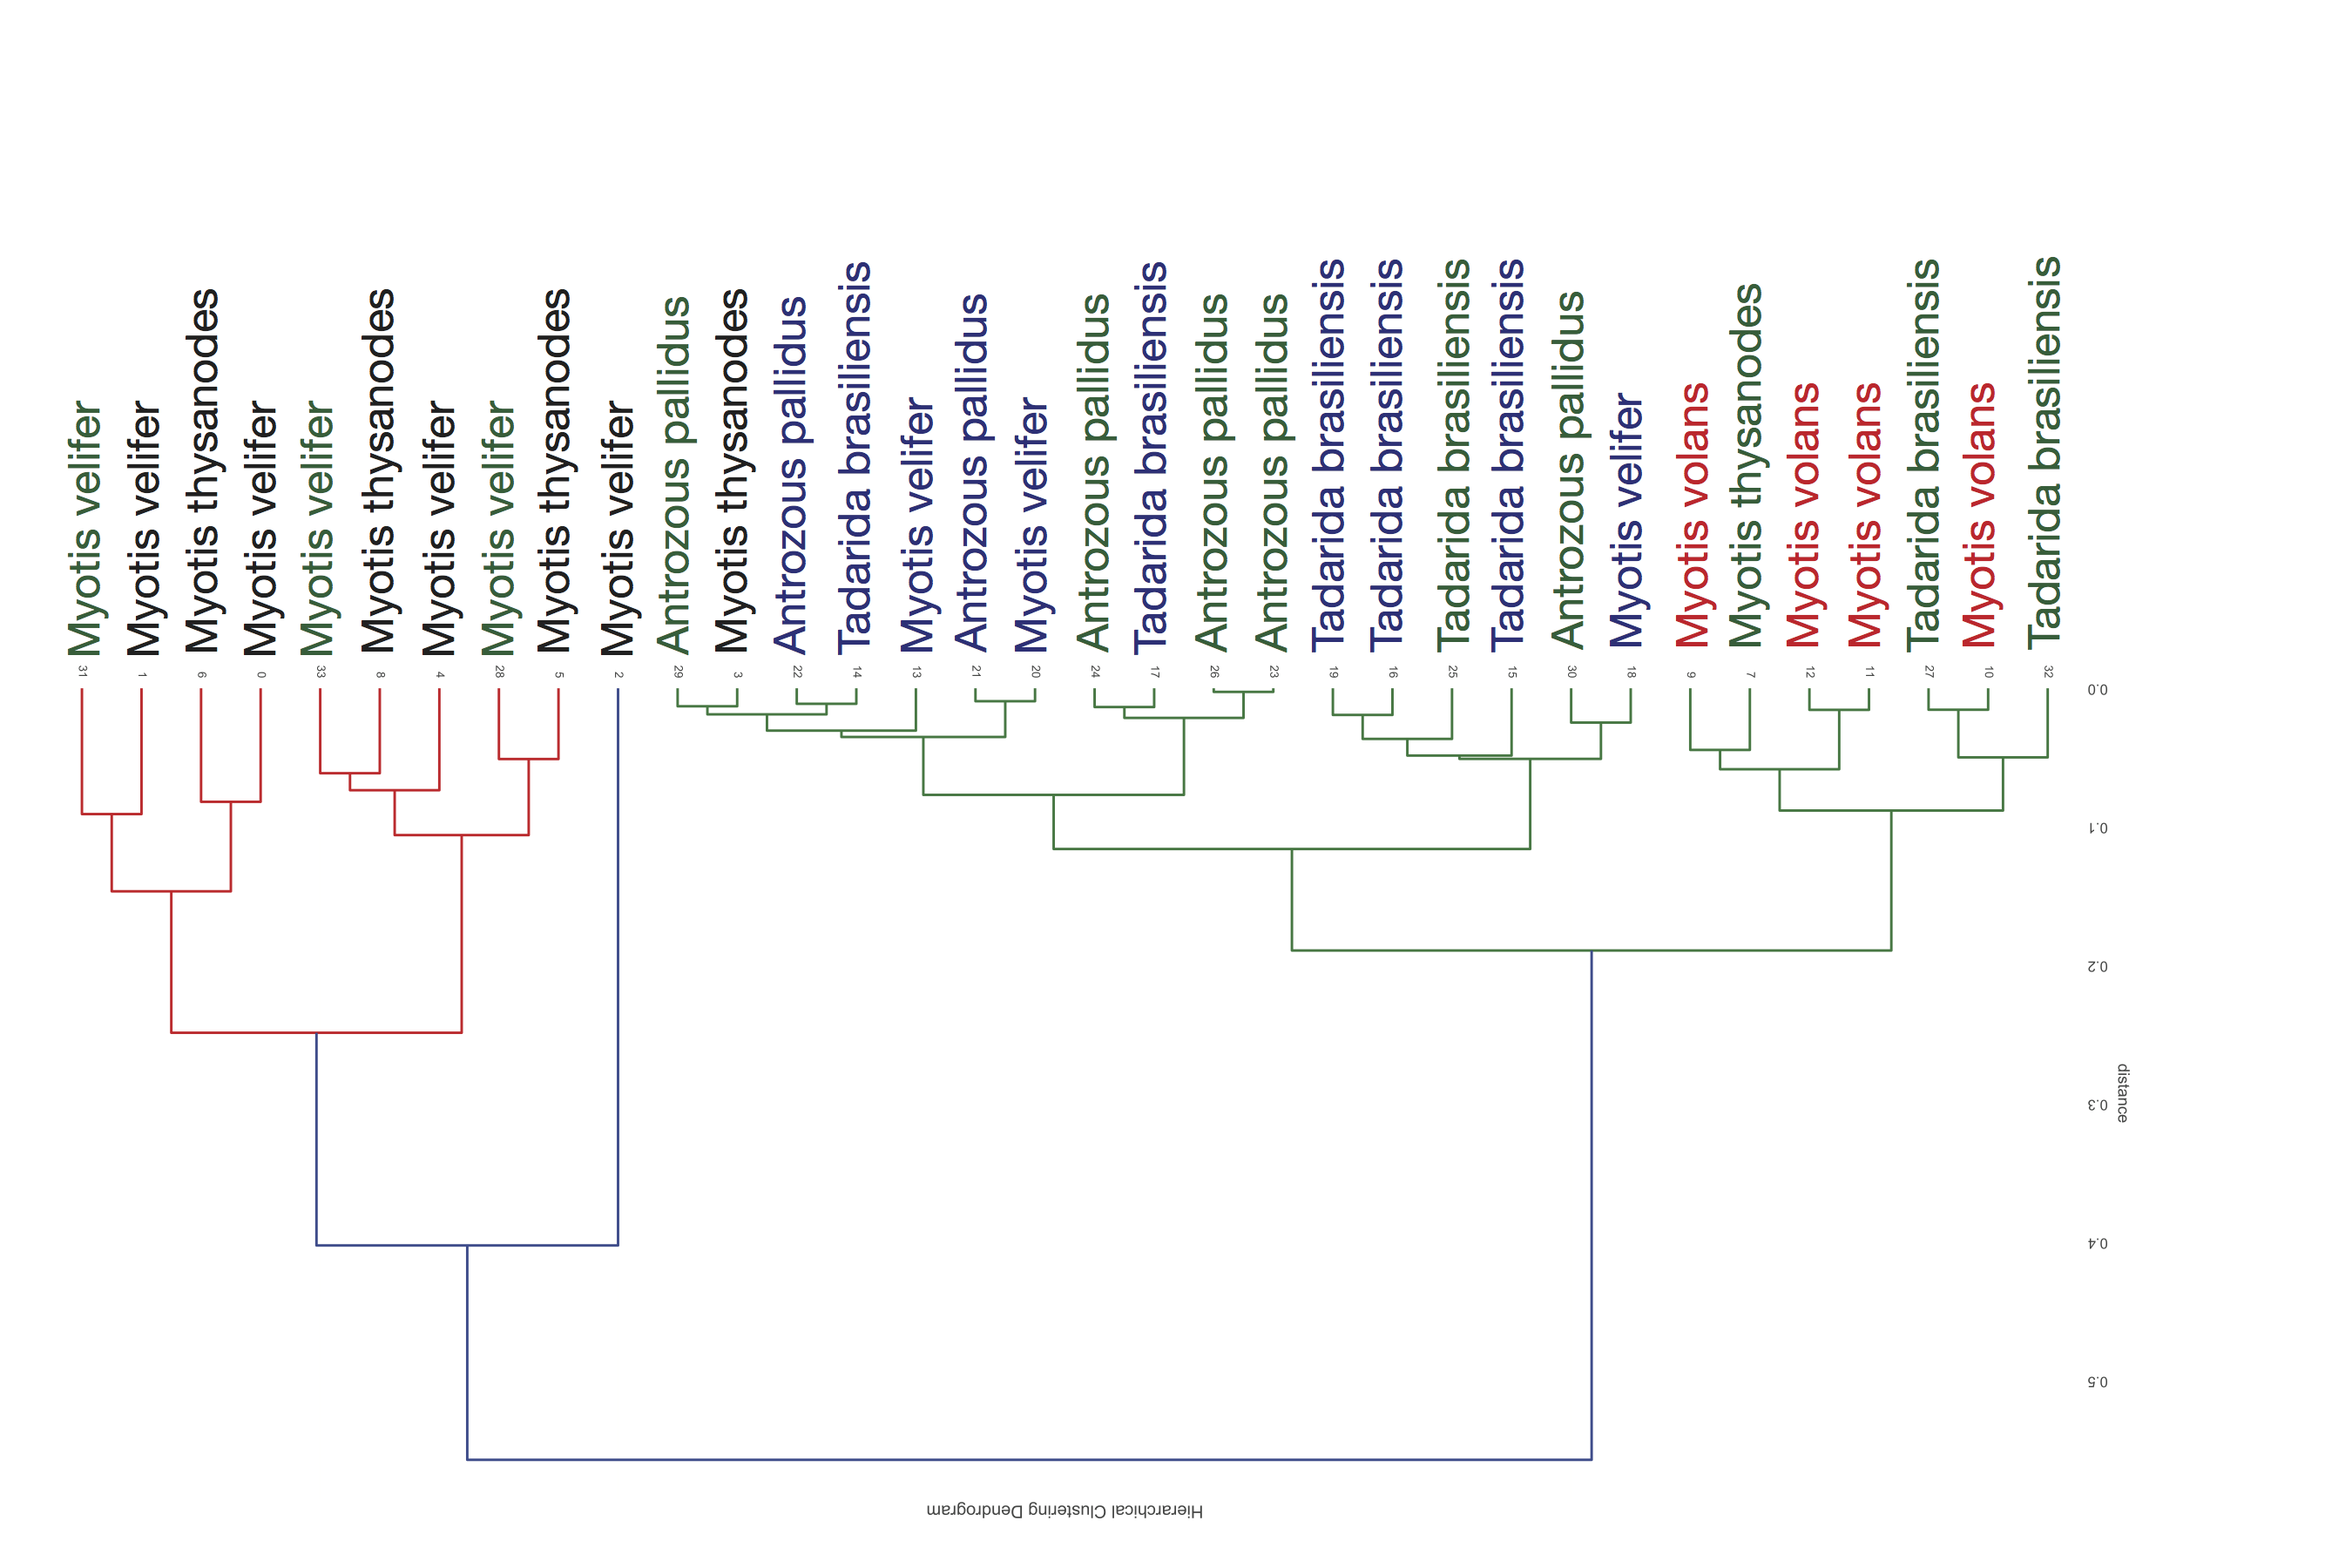

In [56]:
image1 = Image('bat_fungal_NR-PKS_HCA_UGMPA.png')
image1

#### References

Liu L, Zhang Z, Shao CL, Wang JL, Bai H, Wang CY. Bioinformatical analysis of the sequences, structures and functions of fungal polyketide synthase product template domains. Scientific reports. 2015 May 21;5.

Throckmorton K, Wiemann P, Keller NP. Evolution of chemical diversity in a group of non-reduced polyketide gene clusters: using phylogenetics to inform the search for novel fungal natural products. Toxins. 2015 Sep 10;7(9):3572-607.